In [ ]:

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.12.0
Keras Version 2.12.0


In [ ]:
kaggle=pd.read_csv("/content/wine.csv")
df=pd.DataFrame(kaggle)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['quality']=encoder.fit_transform(df['quality'])

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.20,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
x_train=scaler.fit_transform(x_train)
x_valid=scaler.transform(x_valid)
x_test=scaler.transform(x_test)



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
classifier=Sequential()

In [ ]:
classifier.add(Dense(10,input_shape=(11,),activation='relu'))

In [ ]:
classifier.add(Dense(units=10,activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
classifier.add(Dense(units=10,activation='relu'))
classifier.add(Dropout(0.3))

In [ ]:
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable pa

In [ ]:

from tensorflow import keras
logger = keras.callbacks.TensorBoard(
    log_dir="logs",
    write_graph=True,
    histogram_freq=5
)

In [ ]:
early_stopping= tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
CKPT_path = "Model_ckpt.h5"
checkpointing = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [ ]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_history=classifier.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=10,epochs=30,callbacks=[early_stopping,checkpointing])

Epoch 1/30
103/103 [==============================] - 0s 3ms/step - loss: 0.4657 - accuracy: 0.7928 - val_loss: 0.5037 - val_accuracy: 0.7312
Epoch 2/30
103/103 [==============================] - 0s 3ms/step - loss: 0.4738 - accuracy: 0.7761 - val_loss: 0.5073 - val_accuracy: 0.7500
Epoch 3/30
103/103 [==============================] - 0s 3ms/step - loss: 0.4799 - accuracy: 0.7781 - val_loss: 0.5203 - val_accuracy: 0.7281
Epoch 4/30
103/103 [==============================] - 0s 3ms/step - loss: 0.4604 - accuracy: 0.7840 - val_loss: 0.5121 - val_accuracy: 0.7437
Epoch 5/30
103/103 [==============================] - 0s 3ms/step - loss: 0.4533 - accuracy: 0.7928 - val_loss: 0.5064 - val_accuracy: 0.7688
Epoch 6/30
103/103 [==============================] - 0s 4ms/step - loss: 0.4722 - accuracy: 0.7810 - val_loss: 0.5006 - val_accuracy: 0.7656
Epoch 7/30
103/103 [==============================] - 0s 4ms/step - loss: 0.4643 - accuracy: 0.7859 - val_loss: 0.5054 - val_accuracy: 0.7437
Epoch 

In [ ]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 103}

In [ ]:
pd.DataFrame(model_history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.465674,0.792766,0.503688,0.731250
1,0.473834,0.776149,0.507254,0.750000
2,0.479927,0.778104,0.520252,0.728125
3,0.460421,0.783969,0.512105,0.743750
4,0.453262,0.792766,0.506422,0.768750
5,0.472156,0.781036,0.500573,0.765625
6,0.464270,0.785924,0.505383,0.743750
7,0.449460,0.796676,0.509661,0.746875
8,0.471527,0.776149,0.537162,0.737500
9,0.475262,0.785924,0.511189,0.759375


<Axes: >

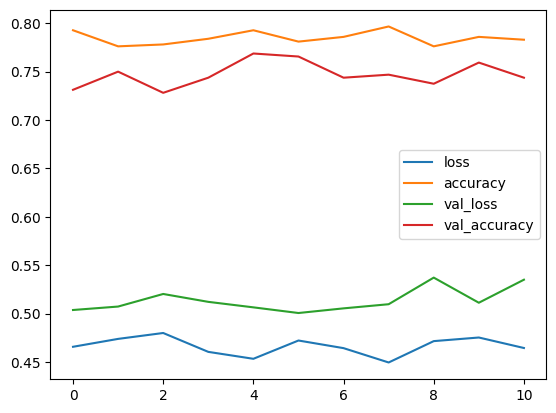

In [ ]:
pd.DataFrame(model_history.history).plot()

In [ ]:
classifier.evaluate(x_test, y_test)

10/10 [==============================] - 0s 11ms/step - loss: 0.5006 - accuracy: 0.7656


[0.5005725622177124, 0.765625]